In [67]:
import sys
sys.path.append("../")
from model import baseline
from utils import prediction_process
from utils import data_cleaning
import torch

from skimage import io
import json

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

In [40]:
def create_rects(js):
    def get_xy_width_height(coordinates):
        #print(coordinates.min(axis=1))
        [x, y] = list(coordinates.min(axis=1)[0])
        width = (coordinates.max(axis=1)[0][0]+1) - coordinates.min(axis=1)[0][0]
        height = (coordinates.max(axis=1)[0][1]+1) - coordinates.min(axis=1)[0][1]
        return x, y, width, height
    
    rects = []
    
    for feature in js['features']:
        if 'record_id' in feature['properties']:
            x, y, width, height = get_xy_width_height(np.array(feature['geometry']['coordinates']))
            rects.append(patches.Rectangle((x,y), width, height, linewidth=1, edgecolor='r', facecolor='none'))
    return rects

In [65]:
def save_image_rects(dir_file, json_name, img_name):

    img_file = os.path.join(dir_file, img_name)
    json_file = os.path.join(dir_file, json_name)

    img = io.imread(img_file)
    with open(json_file, 'rb') as f:
        js = json.load(f)
    im = io.imread(img_file)

    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    rects = create_rects(js)

    # Add the patch to the Axes
    for rect in rects:
        ax.add_patch(rect)

    plt.show()
    fig.savefig(os.path.join(dir_file, img_name.split('.')[0]+"_rects.png"), dpi=fig.dpi)


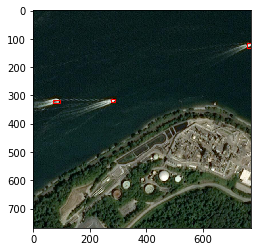

In [66]:
dir_file = 'data'
json_name = '27b4cf2ee48be3f2e65fb51132f2f217.json'
img_name = '27b4cf2ee48be3f2e65fb51132f2f217.jpeg'

save_image_rects(dir_file, json_name, img_name)

In [85]:
npi = 150
img_file = os.path.join(dir_file, img_name)
json_file = os.path.join(dir_file, json_name)

img = io.imread(img_file)
with open(json_file, 'rb') as f:
    js = json.load(f)
im = io.imread(img_file)



boats = []
record = []
for feature in js['features']:
    if 'record_id' in feature['properties']:
        coord = data_cleaning.polygone_to_min_max_coordinates(feature["geometry"]["coordinates"][0])
        boats.append(data_cleaning.create_list_box(img, coord, grid_box=[npi], im_size=768))
        record.append(feature['properties']['record_id'])

id_boat = 0

boat = boats[id_boat][0]
id_boat = record[id_boat]

In [86]:
id_boat+"_"+

'00be81d2-e058-11e9-961f-823d7096ef75'

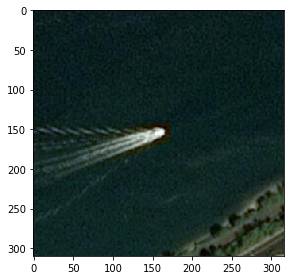

In [81]:
io.imshow(boat)
